In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Максимальные значения характеристик:\n{}".format(cancer.data.max(axis=0)))

Максимальные значения характеристик:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train)))
print("Правильности на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.91
Правильности на тестовом наборе: 0.88


In [4]:
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.965


C:\Java\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [5]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.993
Правильность на тестовом наборе: 0.972


In [6]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


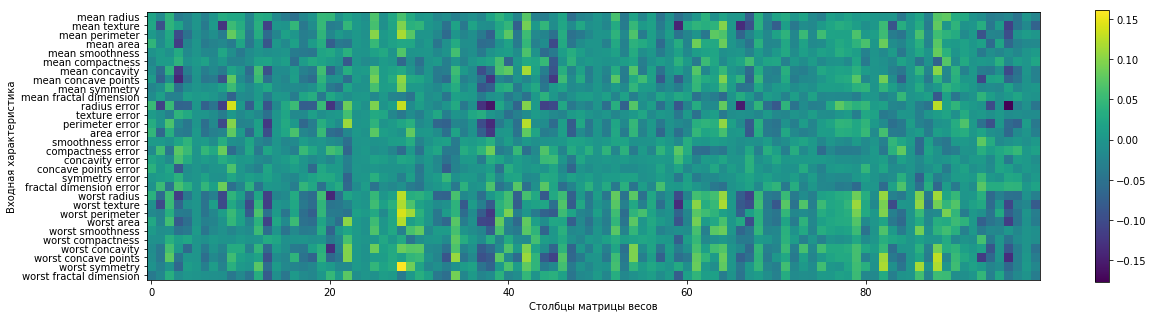

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel("Входная характеристика")
plt.colorbar()
plt.show()